**Implementation of SOM in Python**


Import required libraries

In [89]:
import math
import random
import matplotlib.pyplot as plt
#random.seed(2) #same random numbers every time


SOM class

In [90]:
class SOM:
    def winner(self, weights, sample):  # finds which neuron (weight vector) is closest to the sample
        D0 = 0  # initialize distance to neuron 0
        D1 = 0  # initialize distance to neuron 1

        # Compute Euclidean distance between the sample and each neuron
        for i in range(len(sample)):
            D0 += (sample[i] - weights[0][i])**2
            D1 += (sample[i] - weights[1][i])**2

        return 0 if D0 < D1 else 1

    # Function to update the winning neuron's weights
    def update(self, weights, sample, J, alpha):
        for i in range(len(weights[0])):                         # iterate over each feature of the neuron
            weights[J][i] = weights[J][i] + alpha * (sample[i] - weights[J][i])  # move weight towards the sample
        return weights  # return updated weights

Main

Test Sample s belongs to Cluster: 0
Trained weights: [[0.07247881681108034, 0.13860480851300583, 0.9197702536251562, 0.9969559975201219], [0.9299885766938227, 0.8541028581741731, 0.06897702681594514, 0.004432091088181081]]


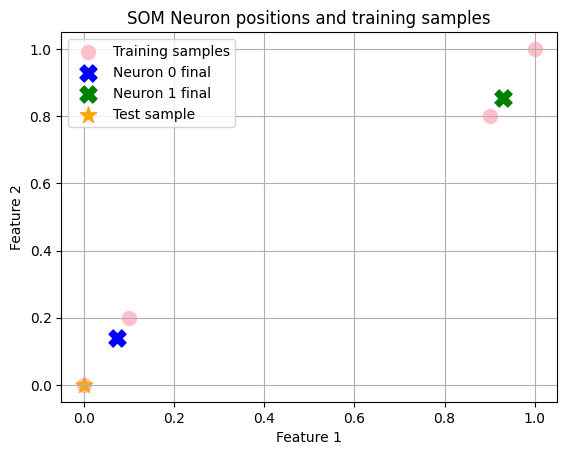

In [91]:


def main():
    # -------------------- Training Data --------------------
    T = [
        [1, 1, 0, 0],   # Cluster 1
        [0.9, 0.8, 0.1, 0],
        [0, 0, 1, 1],   # Cluster 2
        [0.1, 0.2, 0.9, 1]
    ]
    m, n = len(T), len(T[0])  # number of samples and features

    # -------------------- Initialize Weights --------------------
    weights = [[random.random() for _ in range(4)] for _ in range(2)]  # 2 neurons, 4 features each
    ob = SOM()
    epochs = 3
    alpha = 0.5

    # -------------------- Store Weight History --------------------
    weight_history = [[w.copy() for w in weights]]

    # -------------------- Training Loop --------------------
    for i in range(epochs):
        for j in range(m):
            sample = T[j]
            J = ob.winner(weights, sample)
            weights = ob.update(weights, sample, J, alpha)
            weight_history.append([w.copy() for w in weights])

    # -------------------- Testing --------------------
    s = [0, 0, 0, 1]                   # test sample
    J = ob.winner(weights, s)          # find closest neuron
    print("Test Sample s belongs to Cluster:", J)
    print("Trained weights:", weights)

    # -------------------- PLOTTING --------------------
    train_x = [sample[0] for sample in T]
    train_y = [sample[1] for sample in T]

    plt.scatter(train_x, train_y, color='pink', label='Training samples', s=100)
    plt.scatter([weights[0][0]], [weights[0][1]], color='blue', label='Neuron 0 final', s=150, marker='X')
    plt.scatter([weights[1][0]], [weights[1][1]], color='green', label='Neuron 1 final', s=150, marker='X')
    plt.scatter([s[0]], [s[1]], color='orange', label='Test sample', s=150, marker='*')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SOM Neuron positions and training samples')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()





PLOTTING